In [40]:
import os
import charts_function_list
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
_,data_folder,outputs = charts_function_list.folder_setup()

In [686]:
os.chdir(data_folder)
health_grades = pd.read_csv('LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv')

In [687]:
health_grades['ZIP_5']=health_grades['FACILITY ZIP'].apply(lambda x: str(x)[0:5])
health_grades.loc[health_grades['SCORE']<70,'GRADE']='BELOW C'
health_grades = health_grades[health_grades["PROGRAM STATUS"]=='ACTIVE'].copy()
health_grades['FACILITY_WITH_PROGRAM'] = health_grades['FACILITY ID']+health_grades['PROGRAM NAME']

health_grades_active_complete = health_grades

health_grades = health_grades.sort_values(by=['FACILITY_WITH_PROGRAM','ACTIVITY DATE'],ascending=False).drop_duplicates(subset='FACILITY_WITH_PROGRAM').copy()
health_grades.loc[health_grades['PROGRAM NAME'].isnull(),'PROGRAM NAME'] = 'Unknown'

In [969]:
class rest_plots(object):
           
           
    def __init__(self,facecolor,top_pos,group,ymax,rows,columns,width=1,height=2,xmin=79,xmax=102,field='Code Name'):
            self.facecolor = facecolor
            self.top_pos = top_pos
            self.group = group
            self.height = height
            self.width = width
            self.xmin = xmin
            self.xmax = xmax
            self.ymax = ymax
            self.field = field
            self.rows = rows
            self.columns = columns

    def string_search_plots(self,restaurant,left_pos,tag=False,xlabels=False,ylabels=False,multiplier=1,bin_range=33,title=None,new_ticks=False,tick_points=False):  
        ax = plt.subplot2grid((self.rows,self.columns), (self.top_pos,left_pos), colspan=self.width,rowspan=self.height)
        hist =  plt.hist(health_grades[health_grades[self.field]==restaurant]['SCORE'],
                        bins=[(self.xmin+1)+x*multiplier for x in range(bin_range)],edgecolor='white',facecolor=self.facecolor)
        ax.set_ylim(0,self.ymax)
        ax.set_xlim(self.xmin,self.xmax)
        ax.set_xticklabels([int(x) for x in ax.get_xticks()])
        

        #strip labels with if parameter
        if ylabels == True:
            ax.set_ylabel('Count',fontsize=14,color='#525252')
        if xlabels == True:
            ax.set_xlabel('Health Score',fontsize=14,color='#525252',labelpad=0)

        if title != None:
            ax.set_title(title,fontsize=16)
        else:
            ax.set_title(restaurant,fontsize=16)
            
        if tag ==True:
            ax.text(1,.5,self.group,rotation=-90,linespacing=1,fontsize=13,va='center',multialignment='center',transform=ax.transAxes,color=self.facecolor)
        
        if new_ticks== True:
            ax.set_yticks(tick_points)
        return ax
        
    
        
   

In [869]:
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['IN-N-OUT','IN N OUT','IN AND OUT BURGER']))),'Code Name']='In-N-Out'


In [698]:
#code naming

health_grades.loc[health_grades['FACILITY ADDRESS'].str.contains('WORLD WAY'),'GENERAL CATEGORY']='LAX'
health_grades.loc[health_grades['FACILITY ADDRESS'].str.contains('VIN SCULLY'),'GENERAL CATEGORY']='DODGER STADIUM'
health_grades.loc[health_grades['FACILITY ADDRESS'].isin(['1111 FIGUEROA ST','1111 S FIGUEROA ST']),'GENERAL CATEGORY']='STAPLES CENTER'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Burger King')),'Code Name']='Burger King'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['McDonalds','McDonald\'s']))),'Code Name']='McDonald\'s'
#health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Jack in the Box')),'Code Name']='Jack in the Box'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['IN-N-OUT','IN N OUT','IN AND OUT BURGER']))),'Code Name']='In-N-Out'


health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Taco Bell')),'Code Name']='Taco Bell'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Del Taco')),'Code Name']='Del Taco'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('Chipotle')),'Code Name']='Chipotle'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains('CVS'),'Code Name']='CVS'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['Walgreens','Walgreen\'s']))),'Code Name']='Walgreens'
health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['Rite-Aid','RiteAid','Rite Aid']))),'Code Name']='Rite-Aid'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains('PIZZA HUT'),'Code Name']='Pizza Hut'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['Papa John','Papa John\'s',
                                                                                 'Papa Johns','Papa Johns\'']))),'Code Name']='Papa John\'s'

health_grades.loc[health_grades['PROGRAM NAME'].str.contains(str.upper('|'.join(['DOMINOS',
                                                                                  'DOMINO\'S','DOMINOS\'']))),'Code Name']='Domino\'s'

In [806]:
health_grades.pivot_table('SCORE',index='Code Name',aggfunc='count').sort_values(by='SCORE')

,SCORE
Code Name,
Papa John's,60
Del Taco,83
Walgreens,96
Chipotle,101
Burger King,108
Rite-Aid,127
Domino's,138
Taco Bell,146
Pizza Hut,148


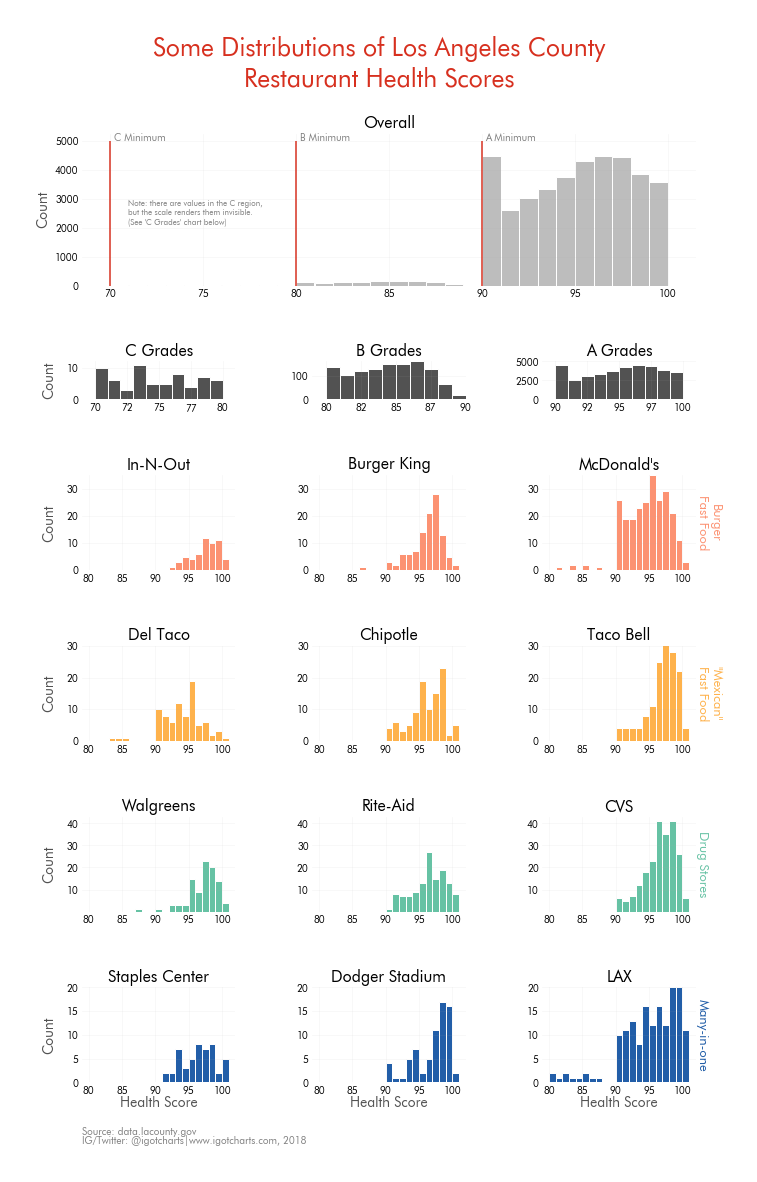

In [970]:
fig = plt.figure(figsize=(11,17))
fig.suptitle('Some Distributions of Los Angeles County\nRestaurant Health Scores',fontsize=25,color='#d7301f')
plt.subplots_adjust(top=.9)
rows=17
columns=3
main_color='#bdbdbd'


ax = plt.subplot2grid((rows,columns), (0,0), colspan=columns,rowspan=3)
hist =  plt.hist(health_grades['SCORE'],bins=[70+x for x in range(31)],edgecolor='white',facecolor=main_color)
ax.set_title('Overall',fontsize=16)  

ax.set_ylabel('Count',fontsize=14,color='#525252',labelpad=5)
ax.vlines(x=90,ymin=0,ymax=5000,colors='#d7301f')
ax.vlines(x=80,ymin=0,ymax=5000,colors='#d7301f')
ax.vlines(x=70,ymin=0,ymax=5000,colors='#d7301f')
ax.text(70.2,5000,'C Minimum',alpha=.5)
ax.text(80.2,5000,'B Minimum',alpha=.5)
ax.text(90.2,5000,'A Minimum',alpha=.5)

ax.text(71,2500,'Note: there are values in the C region,\nbut the scale renders them invisible.\n(See \'C Grades\' chart below)',
        alpha=.5,va='center',fontsize=8)



c_grades = rest_plots(top_pos=4,group='C',ymax=12,xmin=69,height=1,xmax=81,facecolor='#525252',field='GRADE',rows=rows,columns=columns)
c_grades.string_search_plots('C',left_pos=0,ylabels=True,multiplier=1,bin_range=11,title='C Grades')

b_grades = rest_plots(top_pos=4,group='B',ymax=160,xmin=79,height=1,xmax=90,facecolor='#525252',field='GRADE',rows=rows,columns=columns)
b_grades.string_search_plots('B',left_pos=1,multiplier=1,bin_range=11,title='B Grades')

a_grades = rest_plots(top_pos=4,group='C',ymax=5000,xmin=89,height=1,xmax=101,facecolor='#525252',field='GRADE',rows=rows,columns=columns)
ax=a_grades.string_search_plots('A',left_pos=2,multiplier=1,bin_range=11,title='A Grades')
ax.set_yticks([0,2500,5000])

tacos = rest_plots(facecolor='#feb24c',top_pos=9,group='"Mexican"\nFast Food',ymax=30,rows=rows,columns=columns)
tacos.string_search_plots('Del Taco',left_pos=0,ylabels=True)
tacos.string_search_plots('Chipotle',left_pos=1)
tacos.string_search_plots('Taco Bell',left_pos=2,tag=True)


burgers = rest_plots(facecolor='#fc9272',top_pos=6,group='Burger\nFast Food',ymax=35,rows=rows,columns=columns)
burgers.string_search_plots('In-N-Out',left_pos=0,ylabels=True)
burgers.string_search_plots('Burger King',left_pos=1)
burgers.string_search_plots('McDonald\'s',left_pos=2,tag=True)

#pizza = rest_plots(facecolor='#b30000',top_pos=13,group='Pizza\nFast Food',ymax=35,rows=rows,columns=columns)
#pizza.string_search_plots('Papa John\'s',left_pos=0,ylabels=True)
#pizza.string_search_plots('Domino\'s',left_pos=1)
#pizza.string_search_plots('Pizza Hut',left_pos=2,tag=True)

drugs = rest_plots(facecolor='#66c2a4',top_pos=12,group='Drug Stores',ymax=43,rows=rows,columns=columns)
drugs.string_search_plots('Walgreens',left_pos=0,ylabels=True,new_ticks=True,tick_points=[10,20,30,40])
drugs.string_search_plots('Rite-Aid',left_pos=1,new_ticks=True,tick_points=[10,20,30,40])
drugs.string_search_plots('CVS',left_pos=2,tag=True,new_ticks=True,tick_points=[10,20,30,40])

multi_place = rest_plots(facecolor='#225ea8',top_pos=15,group='Many-in-one',ymax=20,rows=rows,columns=columns,field='GENERAL CATEGORY')

ax=multi_place.string_search_plots('STAPLES CENTER',left_pos=0,title='Staples Center',ylabels=True,xlabels=True)
multi_place.string_search_plots('DODGER STADIUM',left_pos=1,title='Dodger Stadium',xlabels=True)
multi_place.string_search_plots('LAX',left_pos=2,tag=True,xlabels=True)

ax.text(0,-.55,'Source: data.lacounty.gov',transform=ax.transAxes,alpha=.5)
ax.text(0,-.65,'IG/Twitter: @igotcharts|www.igotcharts.com, 2018',transform=ax.transAxes,alpha=.5)
os.chdir(outputs)
charts_function_list.chart_save('LA_county_health',dpi=150)

### Other ideas to explore in the future

In [95]:
def pivot_combine(index_type):
    grade_summary = health_grades.pivot_table('SCORE',index=index_type,columns='GRADE',aggfunc='count',margins=True).fillna(0)
    grade_summary_per = grade_summary[['A','B','BELOW C','C']].div(grade_summary['All'],axis=0)
    grade_summary_per['B_Or_Below_Per']=grade_summary_per[['B','BELOW C','C']].sum(axis=1)

    grade_summary_per = grade_summary_per.rename(columns={'A':'A Percent',
                                             'B':'B Percent',
                                            'C':'C Percent',
                                            'BELOW C':'BELOW C Percent'})

    return pd.merge(grade_summary,grade_summary_per,left_index=True,right_index=True,how='left')

In [107]:
pivot_combine('ZIP_5').sort_values(by='C Percent',ascending=False)

GRADE,A,B,BELOW C,C,All,A Percent,B Percent,BELOW C Percent,C Percent,B_Or_Below_Per
ZIP_5,,,,,,,,,,
91749,0.000,2.000,0.000,2.000,4.000,0.000,0.500,0.000,0.500,1.000
90510,4.000,0.000,0.000,1.000,5.000,0.800,0.000,0.000,0.200,0.200
90755,214.000,26.000,1.000,11.000,252.000,0.849,0.103,0.004,0.044,0.151
90506,24.000,0.000,0.000,1.000,25.000,0.960,0.000,0.000,0.040,0.040
90810,60.000,16.000,0.000,3.000,79.000,0.759,0.203,0.000,0.038,0.241
91755,186.000,40.000,1.000,8.000,235.000,0.791,0.170,0.004,0.034,0.209
90704,171.000,59.000,0.000,7.000,237.000,0.722,0.249,0.000,0.030,0.278
93243,38.000,2.000,0.000,1.000,41.000,0.927,0.049,0.000,0.024,0.073
91754,936.000,269.000,2.000,26.000,1233.000,0.759,0.218,0.002,0.021,0.241
